# Тема: Анализ рынка смартфонов с использованием методов машинного обучения. 

### Цель: Создать модель, предсказывающую цену смартфонов по исходным характеристикам смартфона (price_range 0,1,2,3)

### Используемые в ходе анализа алгоритмы обучения:
### · LinearRegression 
### · KNeighborsClassifier
### · LogisticRegression
### · DecisionTreeClassifier
### · DecisionTreeClassifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import csv

import pydotplus as pydot
from IPython.display import Image
from six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

### Загружаем test и train

In [2]:
data_test = pd.read_csv('C:/Dataset_for_kurs/test.csv') 
data_train = pd.read_csv('C:/Dataset_for_kurs/train.csv') 

### Выводим различную информацию о файлах

In [3]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [5]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Размер датасета

In [7]:
print(data_test.shape)
print(data_train.shape)

(1000, 21)
(2000, 21)


### Пустые значения

In [8]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Ценовые диапазоны
##### 3 - Очень дорого 

##### 2 - Немного дороже

##### 1 -  Доступный по цене

##### 0 - Легко доступный по цене 

### Проверка на дубликаты

In [11]:
duplicateRows = data_train[data_train.duplicated ()]
duplicateRows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [9]:
data_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### Все объекты (столбцы)

In [10]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Описание данных

In [11]:
print(data_train.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

## Визуализация данных и анализ

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

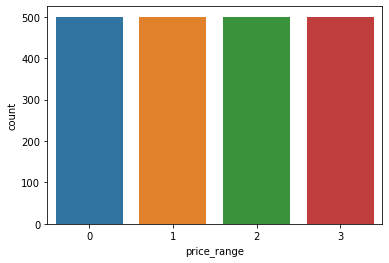

In [12]:
sns.countplot(x='price_range', data=data_train)
data_train['price_range'].value_counts()

### Взаимосвязь цены и оперативной памяти

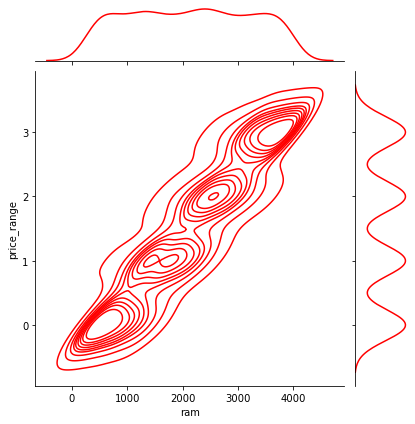

In [13]:
sns.jointplot(x='ram',y='price_range',data=data_train,color='red',kind='kde');

### Взаимосвязь цены и внутренней памяти

In [14]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\ana\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


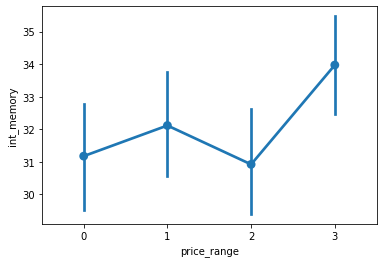

In [17]:
sns.pointplot(y="int_memory", x="price_range", data=data_train)

In [18]:
data_train["int_memory"].mean()

32.0465

In [19]:
mean_C = data_train.loc[data_train['price_range'] == 2, 'int_memory'].mean()
mean_C

30.92

In [20]:
data_train['int_memory'].value_counts()

27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

### Процент телефонов, поддерживающих 3G

In [21]:
labels = ["3G-поддерживает",'3G не поддерживает']
values=data_train['three_g'].value_counts().values

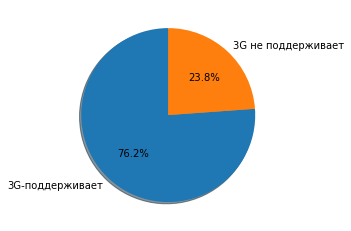

In [22]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Процент телефонов, поддерживающих 4G

In [23]:
labels4g = ["4G-supported",'Not supported']
values4g = data_train['four_g'].value_counts().values

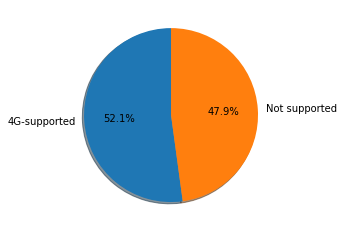

In [24]:
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Мощность батареи vs ценовой диапазон

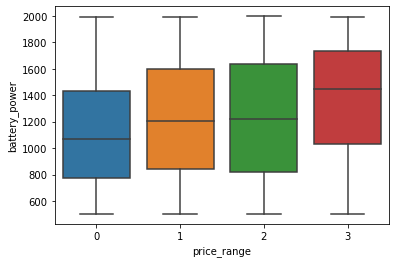

In [25]:
sns.boxplot(x="price_range", y="battery_power", data=data_train)

### Количество смартфонов, имеющих фронтальную и основную камеру

Text(0.5, 0, 'MegaPixels')

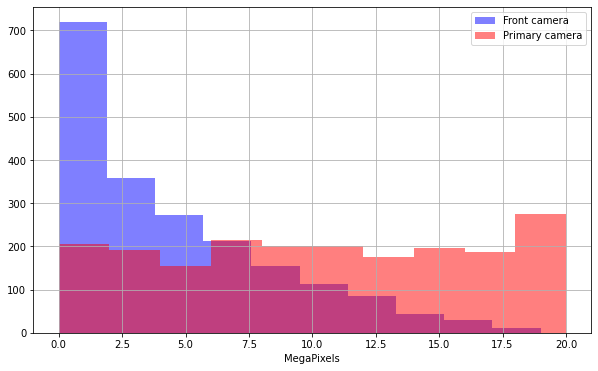

In [26]:
plt.figure(figsize=(10,6))
data_train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
data_train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Взаимосвязь цены от веса смартфонов

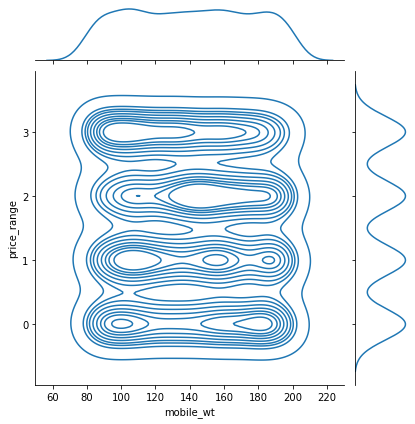

In [27]:
sns.jointplot(x='mobile_wt',y='price_range',data=data_train,kind='kde');

### Взаимосвязь времени работы телефона (включенный режим) и цены

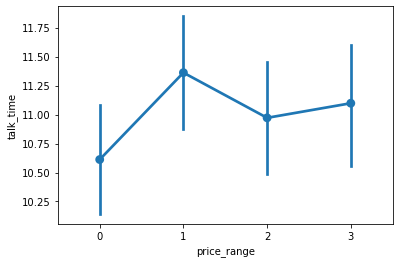

In [28]:
sns.pointplot(y="talk_time", x="price_range", data=data_train)

### X & Y 

In [29]:
X=data_train.drop('price_range',axis=1)

In [30]:
y=data_train['price_range']

### Сплитуем данные

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Создание и обучение модели линейной регрессии

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train,y_train)

LinearRegression()

In [34]:
tlrm = lm.score(X_test,y_test)

In [35]:
lm.score(X_test,y_test)

0.9132801488185276

### Создание и обучение KNN модели

In [36]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [37]:
tknnm = knn.score(X_test,y_test)

In [38]:
knn.score(X_test,y_test)

0.9212121212121213

### Способ определения оптимального значения

In [39]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Частота ошибок')

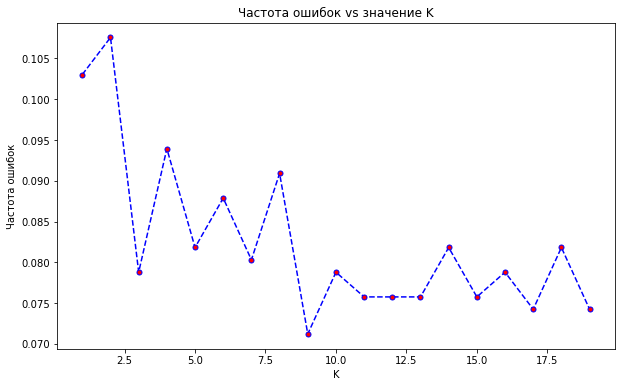

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Частота ошибок vs значение K')
plt.xlabel('K')
plt.ylabel('Частота ошибок')

### Создание и обучение логистической модели

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train,y_train)

C:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
lgr = logmodel.score(X_test,y_test)

In [44]:
logmodel.score(X_test,y_test)

0.6181818181818182

### Создание и обучение модели дерева решений

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
tdtm = dtree.score(X_test,y_test)

In [48]:
dtree.score(X_test,y_test)

0.8151515151515152

### Создание и обучение модели случайного леса

In [49]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [50]:
tranrtm = rfc.score(X_test,y_test)

In [51]:
rfc.score(X_test,y_test)

0.8833333333333333

### Результат - Линейная Регрессия

In [52]:
y_pred=lm.predict(X_test)

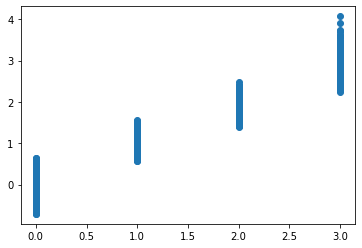

In [53]:
plt.scatter(y_test,y_pred)

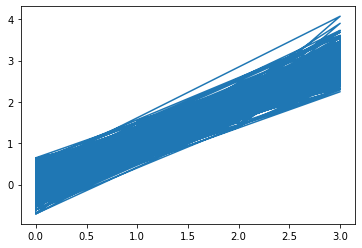

In [54]:
plt.plot(y_test,y_pred)

### Результат - KNN

In [55]:
pred = knn.predict(X_test)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [57]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


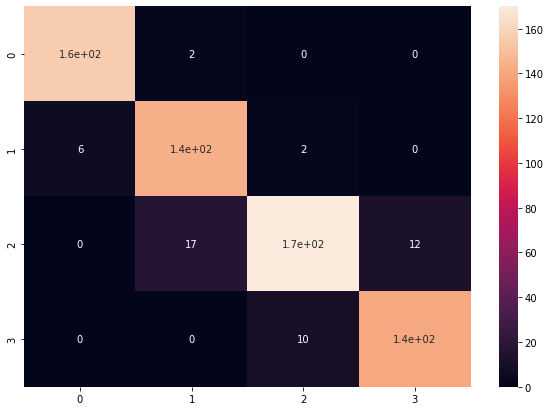

In [58]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

### Прогнозирование цены с использованием KNN

In [59]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [60]:
data_test["wifi"].mean()

0.507

In [61]:
data_test=data_test.drop('id',axis=1)

In [62]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Модель

In [63]:
predicted_price=knn.predict(data_test)

### Добавление прогнозируемой цены в test

In [64]:
data_test['price_range']=predicted_price

In [65]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


### Accuracy

In [66]:
Accuracy_results = pd.DataFrame({'Linear Regression':[tlrm], 'KNeighborsClassifier':[tknnm], 'LogisticRegression':[lgr],
                                'DecisionTreeClassifier':[tdtm], 'RandomForestClassifier':[tranrtm]}, index=['Accuracy'])

Accuracy_results

,Linear Regression,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
Accuracy,0.91328,0.921212,0.618182,0.815152,0.883333


## Пример собственного test.csv

In [78]:
# получаем данные от пользователя
print('Данные Айфон 13')
battery_power = input("Введи емкость аккумулятора в mAh ~3240")
blue = input("Наличие Bluetooth (1 - есть, 0 - нет) ")
clock_speed = input("Частота процессора ~3 ")
dual_sim = input("Наличие двух SIM-карт (1 - есть, 0 - нет) ")
fc = input("Разрешение фронтальной камеры в мегапикселях ~12мп ")
four_g = input("Наличие 4G (1 - есть, 0 - нет) ")
int_memory = input("Внутренняя память в ГБ ~128Гб ")
m_dep = input("Толщина устройства в см ~1 ")
mobile_wt = input("Вес устройства в граммах ~173г ")
n_cores = input("Количество ядер процессора ~6 ")
pc = input("Разрешение основной камеры в мегапикселях ~12мп ")
px_height = input("Высота экрана в пикселях ~2500 ")
px_width = input("Ширина экрана в пикселях ~1170 ")
ram = input("Объем оперативной памяти в МБ ~4096 ")
sc_h = input("Высота экрана в сантиметрах ~13 ")
sc_w = input("Ширина экрана в сантиметрах ~6 ")
talk_time = input("Время работы от одной зарядки в часах ~15 ")
three_g = input("Наличие 3G (1 - есть, 0 - нет) ")
touch_screen = input("Наличие сенсорного экрана (1 - есть, 0 - нет) ")
wifi = input("Наличие WiFi (1 - есть, 0 - нет) ")


#battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,
#m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi

# записываем данные в список списков
user_data = [
    ['battery_power', battery_power],
    ['bluetooth', blue],
    ['clock_speed', clock_speed],
    ['dual_sim',dual_sim],
    ['fc',fc],
    ['four_g',four_g],
    ['int_memory',int_memory],
    ['m_dep',m_dep],
    ['mobile_wt',mobile_wt],
    ['n_cores',n_cores],
    ['pc',pc],
    ['px_height',px_height],
    ['px_width',px_width],
    ['ram',ram],
    ['sc_h',sc_h],
    ['sc_w',sc_w],
    ['talk_time',talk_time],
    ['three_g',three_g],
    ['touch_screen',touch_screen],
    ['wifi',wifi]
]

# транспонируем список и записываем данные в файл CSV
with open('C:/Dataset_for_kurs/data_test_new.csv', mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(zip(*user_data))

Данные Айфон 13
Введи емкость аккумулятора в mAh ~32403240
Наличие Bluetooth (1 - есть, 0 - нет) 1
Частота процессора ~3 3
Наличие двух SIM-карт (1 - есть, 0 - нет) 0
Разрешение фронтальной камеры в мегапикселях ~12мп 12
Наличие 4G (1 - есть, 0 - нет) 1
Внутренняя память в ГБ ~128Гб 128
Толщина устройства в см ~1 1
Вес устройства в граммах ~173г 173
Количество ядер процессора ~6 6
Разрешение основной камеры в мегапикселях ~12мп 12
Высота экрана в пикселях ~2500 2500
Ширина экрана в пикселях ~1170 1170
Объем оперативной памяти в МБ ~4096 4096
Высота экрана в сантиметрах ~13 13
Ширина экрана в сантиметрах ~6 6
Время работы от одной зарядки в часах ~15 15
Наличие 3G (1 - есть, 0 - нет) 1
Наличие сенсорного экрана (1 - есть, 0 - нет) 1
Наличие WiFi (1 - есть, 0 - нет) 1


In [79]:
data_test_new = pd.read_csv('C:/Dataset_for_kurs/data_test_new.csv') #загружаем test датасет

In [80]:
data_test_new

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,3240,1,3,0,12,1,128,1,173,6,12,2500,1170,4096,13,6,15,1,1,1


In [81]:
predicted_price=knn.predict(data_test_new)

In [82]:
data_test_new['price_range']=predicted_price

In [83]:
data_test_new

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,3240,1,3,0,12,1,128,1,173,6,...,2500,1170,4096,13,6,15,1,1,1,3
